<a href="https://colab.research.google.com/github/dgg7394/ProgrammingAssignment2/blob/master/InstagramPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# David's path
path2 = 'drive/MyDrive/Marketing Analytics/Data/instagram_data.csv'

#read csv file
df = pd.read_csv(path)
df

,Unnamed: 0,likes,feature_complexity,design_complexity,beach,cute_animals,face,followers,posts,time_of_day,season,caption_sentiment
0,0,20,1.593168,0.980899,0.0,0.0,0.0,929.0,5.793014,afternoon,spring,-1.0
1,1,19,1.548011,0.896260,0.0,0.0,0.0,765.0,4.624973,afternoon,spring,2.0
2,2,476,1.499784,0.814901,0.0,0.0,0.0,94199.0,6.595781,afternoon,spring,1.0
3,3,1504,1.596202,0.726981,0.0,0.0,1.0,213389.0,6.161207,afternoon,spring,0.0
4,4,92,1.408038,0.436675,0.0,0.0,0.0,3728.0,6.192362,afternoon,spring,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147958,147958,17,1.568694,0.738745,0.0,0.0,0.0,5426.0,6.787845,night,spring,0.0
147959,147959,14,1.677964,0.453014,0.0,0.0,0.0,1527.0,4.969813,night,spring,0.0
147960,147960,28,1.605179,0.455593,0.0,0.0,0.0,5426.0,6.787845,night,spring,0.0
147961,147961,321,1.615784,0.666149,0.0,0.0,1.0,36750.0,5.948035,night,spring,0.0


### To correct the 'night' text in the season column

In [ ]:
df['season'].unique()

array(['spring', 'summer', 'night', 'winter'], dtype=object)

In [ ]:
df.loc[df['season'] == 'night', 'season'] = 'fall'

In [ ]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

# Analyzing the Data

## 1. Regression/Log Transformation of the Likes column

Likes cannot be used for regression in its current due to it not being a normal distribution. Thus, we need to log transform the Likes variable.

*To resolve the issue where we were unable to view the histogram due to our attempt to log transform the likes column due to values being 0 we decided to add a like to each posts like count to maintain the same distribution

<Axes: >

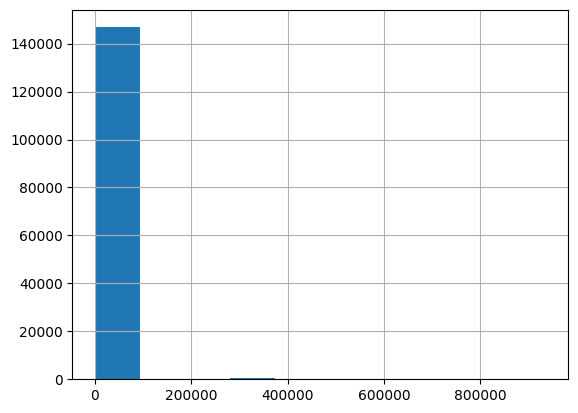

In [ ]:
df.likes.hist()

Because the 'likes' column is not normally distributed, we have to log transform the data to even it out.

<Axes: >

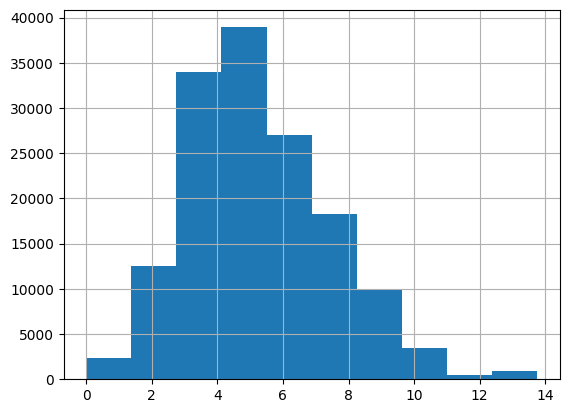

In [ ]:
df.likes.map(lambda x: np.log(x+1)).hist()

## 2. Scatter Plots and Correlation

As observed in the below scatter plots, a Log-Log transformation is most applicable with this data. There is a strong, positive relationship between number of Likes and number of Followers. The correlation can also be characterized as significant due to the p-value being less than alpha.

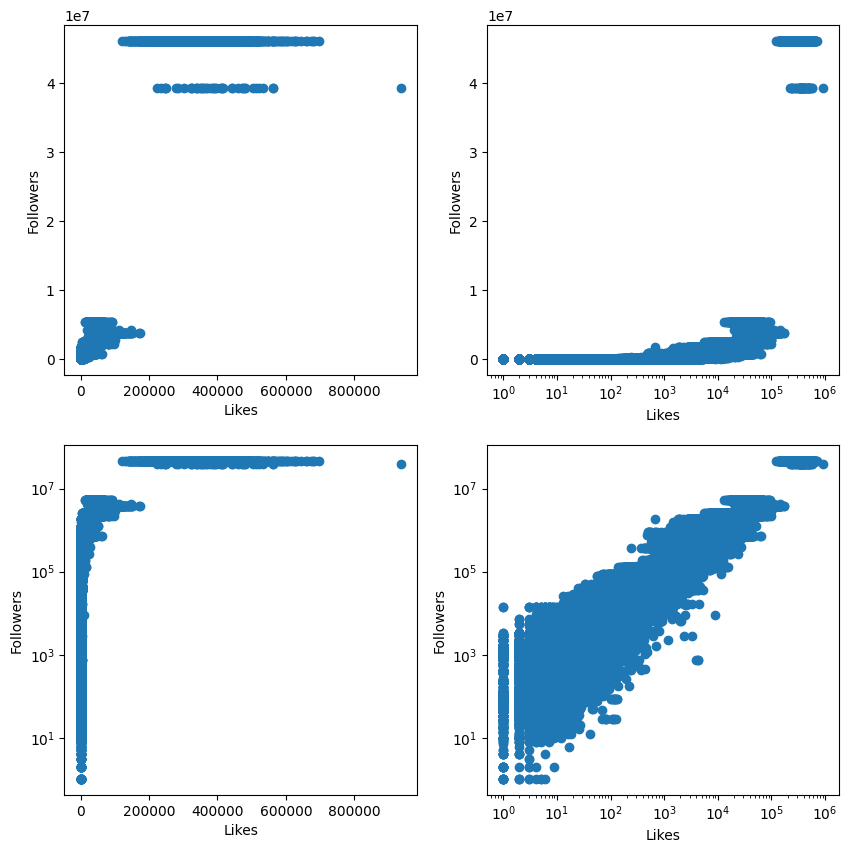

In [ ]:
# linear-linear plot
fig= plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)

ax1.scatter(df['likes'], df['followers'])
ax1.set_xlabel("Likes")
ax1.set_ylabel('Followers')

# log-linear plot
ax2 = fig.add_subplot(2,2,2)

ax2.scatter(df['likes'], df['followers'])
ax2.set_xscale("log")
ax2.set_xlabel("Likes")
ax2.set_ylabel('Followers')

# linear-log plot
ax3 = fig.add_subplot(2,2,3)

ax3.scatter(df['likes'], df['followers'])
ax3.set_yscale('log')
ax3.set_xlabel("Likes")
ax3.set_ylabel('Followers')

# log-log plot
ax4 = fig.add_subplot(2,2,4)

ax4.scatter(df['likes'], df['followers'])
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_xlabel("Likes")
ax4.set_ylabel('Followers')


plt.show()

The model that makes the most sense to use would be in plot 4, the log-log model. This model is the most linear, compared to all the other plots.

## 3. Dataframe Summary and Correlation

High correlation significance for all variables except caption sentiment.

In [ ]:
# to be used in step 4
import statsmodels.formula.api as smf
df['loglikes']= np.log(df['likes'] + 1)
df['logfollowers'] = np.log(df['followers'] + 1)
res = smf.ols('loglikes ~ logfollowers + feature_complexity + design_complexity + posts + caption_sentiment', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loglikes   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.846e+05
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:52   Log-Likelihood:            -1.7952e+05
No. Observations:              147963   AIC:                         3.591e+05
Df Residuals:                  147957   BIC:                         3.591e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.0523      0.018   -114.267      0.000      -2.087      -2.017
logfollowers           0.9054      0.001    776.357      0.000       0.903       0.908
feature_complexity     0.2091      0.008     25.390      0.000       0.193       0.225
design_complexity     -0.0578      0.008     -7.271      0.000      -0.073      -0.042
posts                 -0.2666      0.003    -91.178      0.000      -0.272      -0.261
caption_sentiment      0.0045      0.002      2.158      0.031       0.000       0.009
==============================================================================
Omnibus:                     5184.323   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7313.538
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       3.810   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Multiple Regression

Observations:
- All of the predictor variables have a significant correlation.
- The higher the feature complexity, the higher the number of likes. Same with number of followers, opposite with design complexity.
- The r-squared is 85.4%, so this is a pretty solid model.
- The relationship between likes and followers based on the regular coefficient suggests that for each percentage increase in followers there is a .84 percent increase in likes, on average.

In [ ]:
import statsmodels.formula.api as smf
df['loglikes']= np.log(df['likes'] + 1)
df['logfollowers'] = np.log(df['followers'] + 1)
res = smf.ols('loglikes ~ feature_complexity + design_complexity + logfollowers', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loglikes   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 2.887e+05
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:52   Log-Likelihood:            -1.8357e+05
No. Observations:              147963   AIC:                         3.671e+05
Df Residuals:                  147959   BIC:                         3.672e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.9647      0.015   -194.128      0.000      -2.995      -2.935
feature_complexity     0.1910      0.008     22.580      0.000       0.174       0.208
design_complexity     -0.0860      0.008    -10.541      0.000      -0.102      -0.070
logfollowers           0.8362      0.001    918.770      0.000       0.834       0.838
==============================================================================
Omnibus:                     4486.534   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7318.575
Skew:                          -0.283   Prob(JB):                         0.00
Kurtosis:                       3.931   Cond. No.                         76.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Dummy Variables

Since both 'Time of Day' and 'Season' variables have four categories, we are able to create 8 total variables, 4 for each. In the regression formula we leave one out so that we can interpret the coefficients relative to the omitted category.

In [ ]:
newdf = pd.get_dummies(df, columns = ['time_of_day', 'season'])

In [ ]:
newdf

,Unnamed: 0,likes,feature_complexity,design_complexity,beach,cute_animals,face,followers,posts,caption_sentiment,loglikes,logfollowers,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,season_fall,season_spring,season_summer,season_winter
0,0,20,1.593168,0.980899,0.0,0.0,0.0,929.0,5.793014,-1.0,3.044522,6.835185,1,0,0,0,0,1,0,0
1,1,19,1.548011,0.896260,0.0,0.0,0.0,765.0,4.624973,2.0,2.995732,6.641182,1,0,0,0,0,1,0,0
2,2,476,1.499784,0.814901,0.0,0.0,0.0,94199.0,6.595781,1.0,6.167516,11.453175,1,0,0,0,0,1,0,0
3,3,1504,1.596202,0.726981,0.0,0.0,1.0,213389.0,6.161207,0.0,7.316548,12.270877,1,0,0,0,0,1,0,0
4,4,92,1.408038,0.436675,0.0,0.0,0.0,3728.0,6.192362,0.0,4.532599,8.223895,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147958,147958,17,1.568694,0.738745,0.0,0.0,0.0,5426.0,6.787845,0.0,2.890372,8.599142,0,0,0,1,0,1,0,0
147959,147959,14,1.677964,0.453014,0.0,0.0,0.0,1527.0,4.969813,0.0,2.708050,7.331715,0,0,0,1,0,1,0,0
147960,147960,28,1.605179,0.455593,0.0,0.0,0.0,5426.0,6.787845,0.0,3.367296,8.599142,0,0,0,1,0,1,0,0
147961,147961,321,1.615784,0.666149,0.0,0.0,1.0,36750.0,5.948035,0.0,5.774552,10.511921,0,0,0,1,0,1,0,0


## 6. Expanded Regression

Observations:

- The new regression explains much more of the loglikes variable than the regression in the previous step, with an R-squared of 30.2%.
- If the post is made during the evening, there will be a 0.253% increase in likes as compared to if the post was made during the afternoon, on average.
- For each additional post that is made on the account, there will be 1.23% percent more likes, on average.

We manually created dummy variables for both time of day and season by including a "C" and parenthesis around both column names.

In [ ]:
res = smf.ols('loglikes ~ C(time_of_day) + C(season) + posts + caption_sentiment + beach + cute_animals + face', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loglikes   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     5809.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:53   Log-Likelihood:            -2.9941e+05
No. Observations:              147963   AIC:                         5.988e+05
Df Residuals:                  147951   BIC:                         5.990e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.3509      0.033    -71.868      0.000      -2.415      -2.287
C(time_of_day)[T.evening]     0.2530      0.012     21.926      0.000       0.230       0.276
C(time_of_day)[T.morning]    -0.2960      0.016    -18.471      0.000      -0.327      -0.265
C(time_of_day)[T.night]       0.3471      0.014     24.669      0.000       0.319       0.375
C(season)[T.spring]           0.0468      0.017      2.699      0.007       0.013       0.081
C(season)[T.summer]          -0.1714      0.012    -14.403      0.000      -0.195      -0.148
C(season)[T.winter]           0.2565      0.013     20.441      0.000       0.232       0.281
posts                         1.2315      0.005    243.900      0.000       1.222       1.241
caption_sentiment             0.0056      0.005      1.207      0.228      -0.004       0.015
beach                         0.4952      0.047     10.589      0.000       0.404       0.587
cute_animals                 -0.0103      0.058     -0.177      0.860      -0.125       0.104
face                         -0.0783      0.011     -7.116      0.000      -0.100      -0.057
==============================================================================
Omnibus:                     1176.104   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1353.831
Skew:                           0.168   Prob(JB):                    1.05e-294
Kurtosis:                       3.327   Cond. No.                         77.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Adding Quadratic Terms

Interpretations:
- Feature Complexity
  - All else equal, the number of predicted likes increases with feature complexity until it hits a degree of 2. After that the number of predicted likes will start decreasing.
- Design Complexity
  - All else equal, the number of predicted likes decreases with design complexity until it hits a degree of 1. After that the number of predicted likes will start increasing.

In [ ]:
res = smf.ols('loglikes ~ feature_complexity + I(feature_complexity **2) + design_complexity + I(design_complexity**2) + C(time_of_day) + C(season) + posts + caption_sentiment + beach + cute_animals + face + logfollowers', data = df).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loglikes   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 5.958e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:54   Log-Likelihood:            -1.7747e+05
No. Observations:              147963   AIC:                         3.550e+05
Df Residuals:                  147946   BIC:                         3.551e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.3775      0.035    -68.434      0.000      -2.446      -2.309
C(time_of_day)[T.evening]      0.0432      0.005      8.519      0.000       0.033       0.053
C(time_of_day)[T.morning]      0.0263      0.007      3.733      0.000       0.012       0.040
C(time_of_day)[T.night]        0.0944      0.006     15.268      0.000       0.082       0.106
C(season)[T.spring]           -0.0493      0.008     -6.464      0.000      -0.064      -0.034
C(season)[T.summer]           -0.0975      0.005    -18.635      0.000      -0.108      -0.087
C(season)[T.winter]            0.2004      0.006     36.395      0.000       0.190       0.211
feature_complexity             0.6517      0.048     13.542      0.000       0.557       0.746
I(feature_complexity ** 2)    -0.1570      0.018     -8.557      0.000      -0.193      -0.121
design_complexity             -0.3406      0.030    -11.401      0.000      -0.399      -0.282
I(design_complexity ** 2)      0.1815      0.018     10.140      0.000       0.146       0.217
posts                         -0.2469      0.003    -84.987      0.000      -0.253      -0.241
caption_sentiment              0.0034      0.002      1.688      0.091      -0.001       0.007
beach                          0.1497      0.021      7.276      0.000       0.109       0.190
cute_animals                   0.0028      0.026      0.111      0.912      -0.047       0.053
face                          -0.1217      0.005    -25.079      0.000      -0.131      -0.112
logfollowers                   0.9025      0.001    778.108      0.000       0.900       0.905
==============================================================================
Omnibus:                     5610.296   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8471.747
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       3.918   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Predicted Likes')

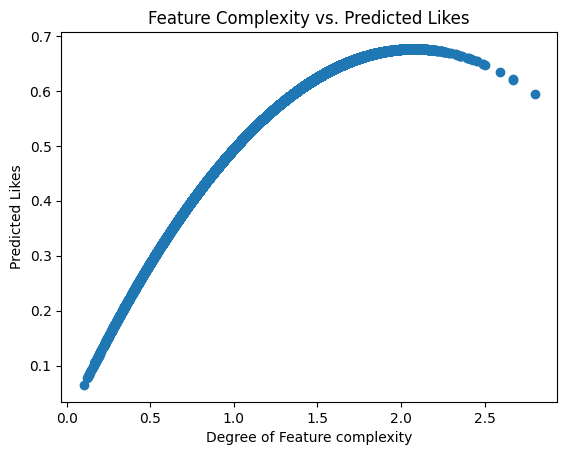

In [ ]:
#Plotting Feature Complexity Quadratic Term

quad_form = (0.6517 * newdf.feature_complexity)  + (-0.1570 * np.power(newdf.feature_complexity, 2))

plt.scatter(newdf.feature_complexity, quad_form)
plt.title('Feature Complexity vs. Predicted Likes')
plt.xlabel('Degree of Feature complexity')
plt.ylabel('Predicted Likes')

Text(0, 0.5, 'Predicted Likes')

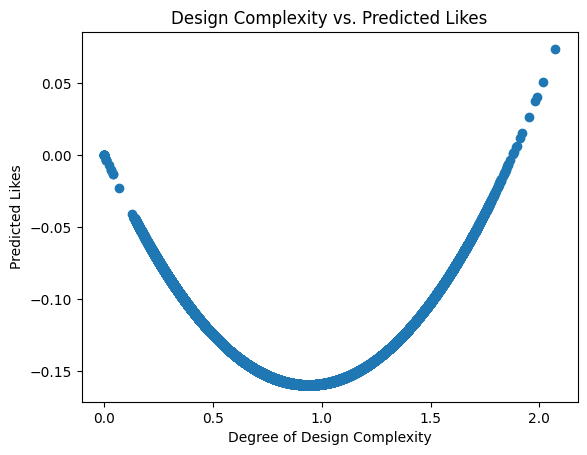

In [ ]:
#Plotting Design Complexity Quadratic Term

quad_form2 = (-0.3406 * newdf.design_complexity)  + (0.1815 * np.power(newdf.design_complexity, 2))

plt.scatter(newdf.design_complexity, quad_form2)
plt.title('Design Complexity vs. Predicted Likes')
plt.xlabel('Degree of Design Complexity')
plt.ylabel('Predicted Likes')

## 8. Marginal Effects

In [ ]:
for x in range(5, 21):
    x_val = x / 10.0
    y = 0.6517 + 2.0 * (-0.1570) * x_val

    print("x = {:.1f}, y = {:.4f}".format(x_val, y))


x = 0.5, y = 0.4947
x = 0.6, y = 0.4633
x = 0.7, y = 0.4319
x = 0.8, y = 0.4005
x = 0.9, y = 0.3691
x = 1.0, y = 0.3377
x = 1.1, y = 0.3063
x = 1.2, y = 0.2749
x = 1.3, y = 0.2435
x = 1.4, y = 0.2121
x = 1.5, y = 0.1807
x = 1.6, y = 0.1493
x = 1.7, y = 0.1179
x = 1.8, y = 0.0865
x = 1.9, y = 0.0551
x = 2.0, y = 0.0237


For every one unit increase in feature complexity, the log likes will increase by the y values shown above. At 0.5, log likes are .4947%, whereas at at 1, log likes are 0.3377%. As feature complexity increases, log likes decrease.

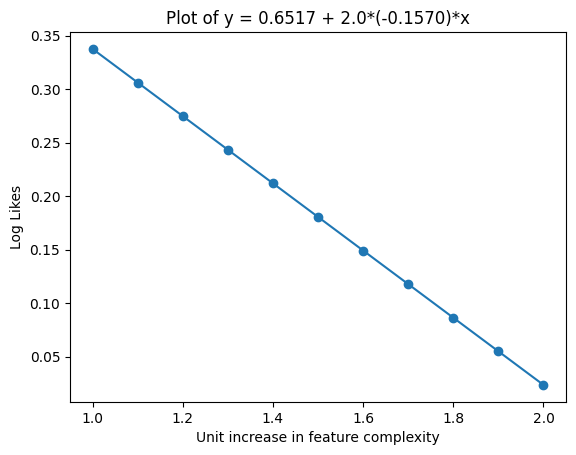

In [ ]:
results = {}

for x in range(10, 21):
    x_val = x / 10.0
    y = 0.6517 + 2.0 * (-0.1570) * x_val
    results[x_val] = y

plt.plot(list(results.keys()), list(results.values()), 'o-')
plt.xlabel('Unit increase in feature complexity')
plt.ylabel('Log Likes')
plt.title('Plot of y = 0.6517 + 2.0*(-0.1570)*x')
plt.show()


## 9. 'Faces' Interaction

All else equal, while there is a 0.05 percent increase in likes when there is a human face with a beach as opposed to no beach, the p-value makes this interaction insignificant. This would make Reddit incorrect.

In [ ]:
res = smf.ols('loglikes ~ feature_complexity + I(feature_complexity **2) + design_complexity + I(design_complexity**2) + C(time_of_day) + C(season) + posts + caption_sentiment + beach + cute_animals + face + logfollowers + face:beach', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loglikes   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 5.607e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        19:11:59   Log-Likelihood:            -1.7747e+05
No. Observations:              147963   AIC:                         3.550e+05
Df Residuals:                  147945   BIC:                         3.552e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.3774      0.035    -68.430      0.000      -2.446      -2.309
C(time_of_day)[T.evening]      0.0432      0.005      8.520      0.000       0.033       0.053
C(time_of_day)[T.morning]      0.0263      0.007      3.730      0.000       0.012       0.040
C(time_of_day)[T.night]        0.0944      0.006     15.273      0.000       0.082       0.107
C(season)[T.spring]           -0.0493      0.008     -6.465      0.000      -0.064      -0.034
C(season)[T.summer]           -0.0975      0.005    -18.639      0.000      -0.108      -0.087
C(season)[T.winter]            0.2004      0.006     36.392      0.000       0.190       0.211
feature_complexity             0.6518      0.048     13.544      0.000       0.557       0.746
I(feature_complexity ** 2)    -0.1570      0.018     -8.558      0.000      -0.193      -0.121
design_complexity             -0.3408      0.030    -11.408      0.000      -0.399      -0.282
I(design_complexity ** 2)      0.1816      0.018     10.146      0.000       0.146       0.217
posts                         -0.2470      0.003    -84.988      0.000      -0.253      -0.241
caption_sentiment              0.0035      0.002      1.693      0.090      -0.001       0.007
beach                          0.1421      0.022      6.441      0.000       0.099       0.185
cute_animals                   0.0027      0.026      0.107      0.915      -0.047       0.053
face                          -0.1220      0.005    -25.076      0.000      -0.132      -0.113
logfollowers                   0.9025      0.001    778.108      0.000       0.900       0.905
face:beach                     0.0585      0.061      0.961      0.337      -0.061       0.178
==============================================================================
Omnibus:                     5612.758   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8477.193
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       3.919   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 10. Advice

- The best way for influencers to gain followers is to get as many likes (exposure) as possible as there is a strong, positive correlation between the two.
- Understand that posting at nighttime will garner the most likes, and that posting in the afternoon will most likely gain the least amount of likes.
- Take advantage of the winter season by posting pictures of the outdoors. This season of the year will get likely get you more likes than the other seasons.
- If possible, post pictures either of the beach or with it in the background as this will likely garner more likes.
- Try to be selective with posts, as the saturation of your account will increase as the number of posts increase.
- Posts that either have a very simple or very complex structure can possibly garner more likes. Try to make posts that either have few symmetrical objects in the image or have a unique/chaotic structure that makes itself stand out.
- Use filters that come off as "natural". Posts that are too dark or too bright may cause likes to decrease compared to regular filters.

## 11. Bonus

Besides the complexity terms and followers, the number of posts that an account has will impact the number of likes the most. This correlation is negative, meaning the more posts and account has will result in less likes per post.